In [1]:
from koselleck import *

In [2]:
m2=load_model('data/models/bpo/1750-1760/run_08/model.bin')
m1=load_model('data/models/bpo/1700-1710/run_08/model.bin')

In [3]:
m1.wv.most_similar('value')

[('profit', 0.7355868816375732),
 ('business', 0.6624550819396973),
 ('allowance', 0.6582502722740173),
 ('trouble', 0.6423209309577942),
 ('sum', 0.6209872961044312),
 ('labour', 0.609950065612793),
 ('spend', 0.5969133377075195),
 ('conversation', 0.5924997329711914),
 ('owner', 0.5906621813774109),
 ('charge', 0.5763142704963684)]

In [4]:
m2.wv.most_similar('value')

[('furn', 0.6674749255180359),
 ('sum', 0.6578428149223328),
 ('fum', 0.6551477909088135),
 ('weight', 0.628524124622345),
 ('yearly', 0.6268061995506287),
 ('amount', 0.626186728477478),
 ('profit', 0.6212000846862793),
 ('sterling', 0.619913637638092),
 ('purchase', 0.6156057119369507),
 ('livres', 0.6130986213684082)]

In [5]:
# dfchange=measure_change_local(m1,m2, words=get_valid_words())
# dfchange

In [13]:
# get_centroid(m1,['value','values'])

In [2]:
# def compute_vector_scores(m,pos,neg=None,z=True):
#     vec=np.array(compute_vector(m,pos,neg), dtype=np.float64)
#     matrix=np.array(m.wv.get_normed_vectors(),dtype=np.float64)
#     res=fastdist.vector_to_matrix_distance(vec,matrix,fastdist.cosine,'cosine')
#     resd=dict((m.wv.index_to_key[i],x)for i,x in enumerate(res))
#     s=pd.Series(resd)
#     if z: s=(s - s.mean())/s.std()
#     return s.sort_values()

In [35]:
with open('/home/ryan/github/0AbsLitHist/data/fields/data.fields.json') as f: jsond=json.load(f)

In [51]:
jsond.keys()

dict_keys(['REF.stopwords', 'HGI.Negativ', 'HGI.Ngtv', 'HGI.Weak', 'HGI.Fail', 'HGI.IAV', 'HGI.AffLoss', 'HGI.AffTot', 'HGI.Passive', 'HGI.Decreas', 'HGI.TranLw', 'HGI.Submit', 'HGI.Finish', 'HGI.Hostile', 'HGI.Arousal', 'HGI.SV', 'HGI.Positiv', 'HGI.Affil', 'HGI.Active', 'HGI.Doctrin', 'HGI.Strong', 'HGI.Virtue', 'HGI.EVAL', 'HGI.Abs@', 'HGI.ABS', 'HGI.MeansLw', 'HGI.Vice', 'HGI.IPadj', 'HGI.Pstv', 'HGI.NegAff', 'HGI.Space', 'HGI.Power', 'HGI.SocRel', 'HGI.PowOth', 'HGI.PowTot', 'HGI.Ovrst', 'HGI.Eval@', 'HGI.IndAdj', 'HGI.Increas', 'HGI.Undrst', 'HGI.Quan', 'HGI.If', 'HGI.DAV', 'HGI.TimeSpc', 'HGI.SureLw', 'HGI.Time@', 'HGI.PowCon', 'HGI.Travel', 'HGI.Know', 'HGI.Yes', 'HGI.ComForm', 'HGI.Means', 'HGI.EnlOth', 'HGI.EnlTot', 'HGI.ECON', 'HGI.WltOth', 'HGI.WltTot', 'HGI.RspLoss', 'HGI.RspTot', 'HGI.PLACE', 'HGI.Land', 'HGI.Nation', 'HGI.Academ', 'HGI.Social', 'HGI.PowGain', 'HGI.EndsLw', 'HGI.PosAff', 'HGI.Causal', 'HGI.TrnLoss', 'HGI.Vary', 'HGI.PowCoop', 'HGI.Rel', 'HGI.Complet', 'HG

In [53]:
# jsond['HGI.Ngtv']

In [64]:
odf1=compute_vector_scores(m1, jsond['HGI.Ngtv'], jsond['HGI.Pstv'])
odf2=compute_vector_scores(m2, jsond['HGI.Ngtv'], jsond['HGI.Pstv'])
w='revolution'
odf1.loc[w], odf2.loc[w]

(-0.4065717223362351, -0.06732622738885709)

In [67]:
psychfields = get_origfields()
abswordseed=psychfields['Abs-Conc.Median.Abs.orig']
concwordseed=psychfields['Abs-Conc.Median.Conc.orig']

In [69]:
w='revolution'
l1=abswordseed
l2=concwordseed

odf1=compute_vector_scores(m1,l1,l2)
odf2=compute_vector_scores(m2,l1,l2)
odf1.loc[w], odf2.loc[w]

(0.33085204007353536, 0.2675164630661123)

In [70]:
compute_vector_scores(m1,'bad','good')

good       -0.749556
best       -0.560671
belt       -0.469898
future     -0.467628
pleasure   -0.452644
              ...   
hid         0.434983
bad         0.459793
bas         0.460895
had         0.519875
having      0.544987
Length: 13907, dtype: float64

In [71]:
compute_vector_scores(m2,'woman','man')

man        -0.489393
almighty   -0.382529
wisdom     -0.369378
finite     -0.357509
goodness   -0.339376
              ...   
woman       0.440443
squires     0.446391
mary        0.457587
maiden      0.484975
young       0.517386
Length: 31982, dtype: float64

In [77]:
def compute_key_vector_scores(m):
    psychfields = get_origfields()
    abswordseed=psychfields['Abs-Conc.Median.Abs.orig']
    concwordseed=psychfields['Abs-Conc.Median.Conc.orig']

    odf=pd.DataFrame({
        'Woman-Man':compute_vector_scores(m,'woman','man'),
        'Good-Bad':compute_vector_scores(m,'good','bad'),
        'Abs-Conc':compute_vector_scores(m,abswordseed,concwordseed)
    })
    return odf.sort_values('Abs-Conc')

In [82]:
m1s=compute_key_vector_scores(m1)
m2s=compute_key_vector_scores(m2)

In [83]:
ms=m1s.join(m2s,lsuffix='1',rsuffix='2')
ms

,Woman-Man1,Good-Bad1,Abs-Conc1,Woman-Man2,Good-Bad2,Abs-Conc2
black,0.201191,-0.069172,-0.854270,0.288171,-0.081853,-0.610260
blue,0.231863,-0.072627,-0.842555,0.198092,-0.067536,-0.662497
blew,0.198465,-0.183830,-0.804766,0.147494,-0.341422,-0.568001
cross,0.200761,-0.132645,-0.804659,0.200379,-0.044554,-0.657741
top,0.214684,-0.158858,-0.804025,0.074460,-0.137393,-0.676994
...,...,...,...,...,...,...
acknowledge,-0.253000,0.132413,0.661806,-0.213425,0.217901,0.576067
faith,-0.273855,0.335024,0.670294,-0.228179,0.292067,0.465837
plainly,-0.116009,0.204917,0.674823,-0.069476,-0.016845,0.340022
god's,-0.173162,0.360876,0.679656,-0.297988,0.323974,0.505723


In [86]:
# for c in ms.columns:
#     ms[c]=ms[c] - ms[c].mean()

In [96]:
msz=to_z(ms,axis=1)
msz

100%|██████████| 6/6 [00:00<00:00, 275.78it/s]


,Woman-Man1,Good-Bad1,Abs-Conc1,Woman-Man2,Good-Bad2,Abs-Conc2
black,1.513252,-0.506398,-2.785207,2.646929,-0.529044,-1.801501
blue,1.797667,-0.534698,-2.740147,1.809396,-0.416121,-1.983340
blew,1.487975,-1.445436,-2.594795,1.338951,-2.576402,-1.654396
cross,1.509265,-1.026240,-2.594384,1.830662,-0.234843,-1.966785
top,1.638364,-1.240921,-2.591946,0.659898,-0.967115,-2.033806
...,...,...,...,...,...,...
acknowledge,-2.698354,1.144567,3.046194,-2.016789,1.835279,2.328135
faith,-2.891734,2.803935,3.078842,-2.153970,2.420264,1.944422
plainly,-1.428071,1.738366,3.096263,-0.678390,-0.016294,1.506457
god's,-1.958038,3.015655,3.114851,-2.803038,2.671931,2.083266


In [105]:
msz.loc[[w for w in get_valid_words() if w in set(msz.index)]]

KeyboardInterrupt: 

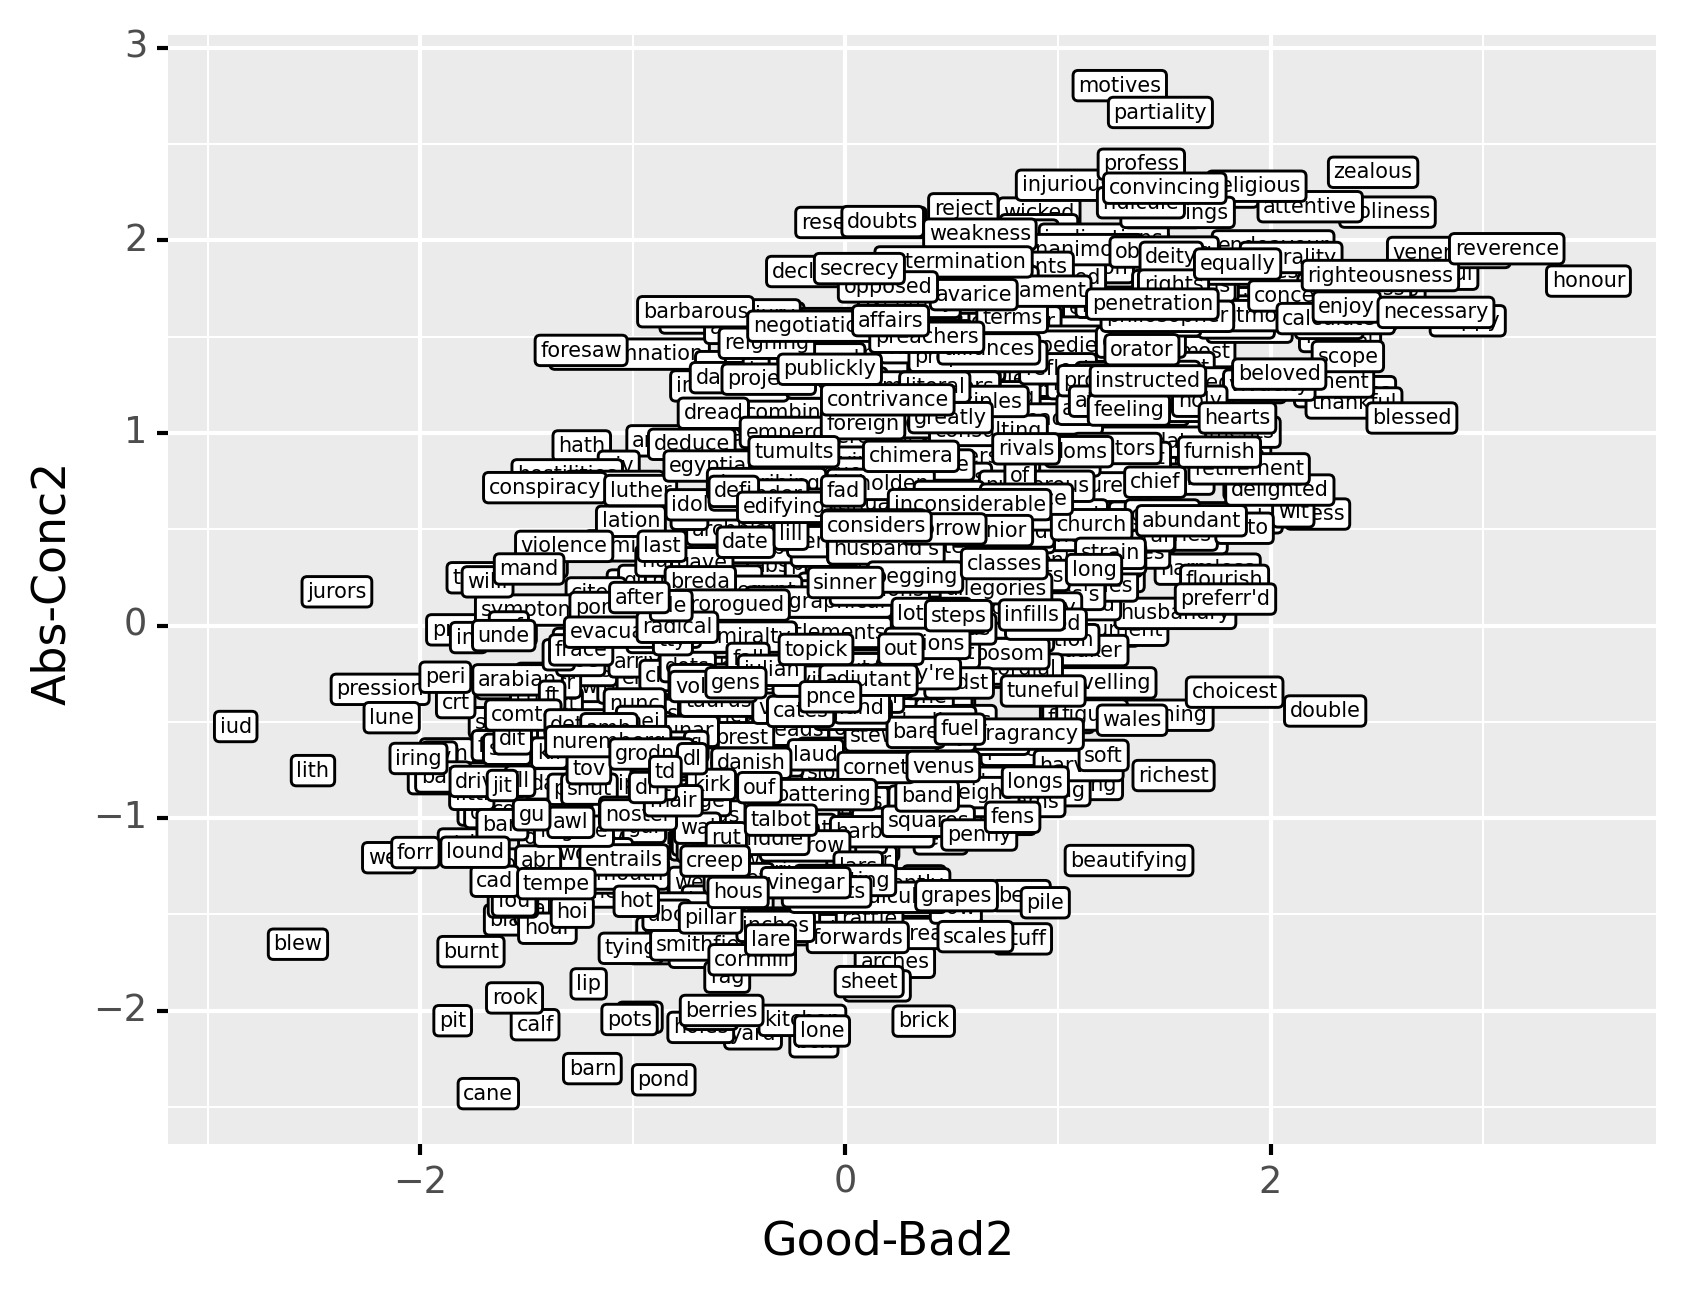

<ggplot: (8775257066313)>

In [103]:
figdf=msz.sample(n=1000).rename_axis('word').reset_index()

p9.ggplot(figdf, p9.aes(x='Good-Bad2',y='Abs-Conc2',label='word')) + p9.geom_label(size=5) #p9.geom_point(size=0.1) 